# MADE UP EXAMPLES FOR EXAM PRACTICE

In [1]:
import numpy as np
import random as rnd
from matplotlib import pyplot as plt

np.random.seed(1)

In [3]:
class Tree:

    def __init__(self):
        self.idx = -1    # The index of the feature over which you split (no split: -1)
        self.thresh = 0  # The threshold value over which you split (<=: left, >: right)
        self.leaf = 0    # 1 if it is a leaf of class 1, -1 if it is a leaf of class -1, 0 if it is an internal node
        self.left = []   # Left subtree (empty if it is a leaf)
        self.right = []  # Right subtree (empty if it is a leaf)


    def count_misclass(left, right):
        # left
        left_plus_prob = len(np.where(left > 0)[0])/len(left)
        left_dominant_sign = 1 if left_plus_prob >= 0.5 else -1
        left_misclass = len(np.where(left != left_dominant_sign)[0])
        # right
        right_plus_prob = len(np.where(right > 0)[0])/len(right)
        right_dominant_sign = 1 if right_plus_prob >= 0.5 else -1
        right_misclass = len(np.where(right != right_dominant_sign)[0])
        # total
        misclass = left_misclass + right_misclass
        return misclass


    def classify(self, x):
        ## TO DO: classify the point x (easy for leaves, you have to go down the tree if the node is internal)
        if (self.leaf != 0):
            return self.leaf
        elif (x[self.idx] > self.thresh):
            return self.right.classify(x)
        else:
            return self.left.classify(x)
        

    def id3_training(self, X, Y, max_depth, printing):
        # Check if the node is a leaf (all nodes have the same label)
        if (np.max(Y) - np.min(Y) < 1e-3):
            self.leaf = np.max(Y)
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all labels are the same over ' + str(len(Y)) + ' points)')
            return
        # If the maximum depth is 0, the node must be a leaf!
        if (max_depth < 1):
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (maximum depth reached, ' + str(len(Y)) + ' points)')
            if (len(np.where(Y > 0)) > len(Y) / 2):
                self.leaf = 1
            else:
                self.leaf = -1
            return
        # Find the best split: iterate over features
        best_idx = -1
        best_thresh = -1
        best_miss = 1e9
        ## TO DO: Iterate over the features and threshold values! 
        for feature in range(X.shape[1]):
            sorted = np.unique(X[:, feature]) # sorted and unique vals
            thresholds = [(sorted[i] + sorted[i+1])/2 for i in range(len(sorted) - 1)]
            for t in thresholds:
                left_idxs = np.where(X[:, feature] <= t)
                right_idxs = np.where(X[:, feature] > t)
                miss = Tree.count_misclass(Y[left_idxs], Y[right_idxs])
                if miss < best_miss:
                    best_idx = feature
                    best_thresh = t
                    best_miss = miss
        ##########################
        if (best_idx == -1):
            # No valid features! The points are all identical
            self.leaf = np.sign(np.sum(Y))
            if (self.leaf == 0):
                self.leaf = 1
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all inputs are the same over ' + str(len(Y)) + ' points)')
            return
        left_samples = np.where(X[:, best_idx] <= best_thresh)[0]
        right_samples = np.where(X[:, best_idx] > best_thresh)[0]
        if (printing):
            print('Remaining depth: ' + str(max_depth) + ', splitting ' + str(len(Y)) + ' elements into ' + str(len(left_samples)) + ' and ' + str(len(right_samples)) + ' over feature ' + str(best_idx))
        ## TO DO: run the next recursive step of ID3 over the left and right subtrees!
        self.thresh = best_thresh
        self.idx = best_idx
        self.left = Tree()
        self.right = Tree()
        self.left.id3_training(X[left_samples], Y[left_samples], max_depth - 1, printing)
        self.right.id3_training(X[right_samples], Y[right_samples], max_depth - 1, printing)

    
    def print_tree(self, depth=0):
        """Pretty-print the tree structure."""
        prefix = "    " * depth  # indentation
        if self.leaf != 0:
            print(prefix + f"Leaf: class {self.leaf}")
        else:
            print(prefix + f"[x{self.idx} <= {self.thresh:.2f}]")
            if self.left:
                print(prefix + "L-> ", end="")
                self.left.print_tree(depth + 1)
            if self.right:
                print(prefix + "R-> ", end="")
                self.right.print_tree(depth + 1)

[[0.8 0.9]
 [0.3 0.8]
 [0.8 0. ]
 [0.5 0.3]
 [0.9 0.9]
 [0.5 0.7]
 [0.6 0. ]
 [0.4 0.7]
 [0.8 0.1]
 [0.6 0.2]]
[-1 -1 -1 -1 -1  1  1  1  1  1]


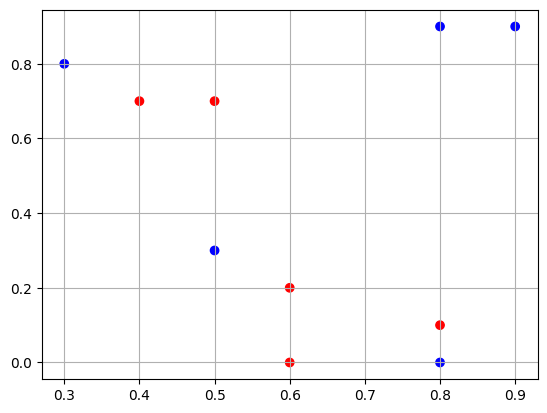

In [16]:
np.random.seed(3)

X = 0.1* np.random.choice(a = np.arange(0, 10), size = (10, 2))
Y = np.array([-1, -1, -1, -1, -1, +1, +1, +1, +1, +1])
color = ["blue" if y==-1 else "red" for y in Y]

print(X)
print(Y)

plt.scatter(X[:, 0], X[:, 1], color = color)
plt.grid()

In [17]:
my_tree = Tree()
my_tree.id3_training(X, Y, 10, True)
my_tree.print_tree()

Remaining depth: 10, splitting 10 elements into 7 and 3 over feature 1
Remaining depth: 9, splitting 7 elements into 1 and 6 over feature 0
Remaining depth: 8, leaf node (all labels are the same over 1 points)
Remaining depth: 8, splitting 6 elements into 2 and 4 over feature 0
Remaining depth: 7, splitting 2 elements into 1 and 1 over feature 1
Remaining depth: 6, leaf node (all labels are the same over 1 points)
Remaining depth: 6, leaf node (all labels are the same over 1 points)
Remaining depth: 7, splitting 4 elements into 2 and 2 over feature 0
Remaining depth: 6, leaf node (all labels are the same over 2 points)
Remaining depth: 6, splitting 2 elements into 1 and 1 over feature 1
Remaining depth: 5, leaf node (all labels are the same over 1 points)
Remaining depth: 5, leaf node (all labels are the same over 1 points)
Remaining depth: 9, leaf node (all labels are the same over 3 points)
[x1 <= 0.75]
L->     [x0 <= 0.45]
    L->         Leaf: class 1
    R->         [x0 <= 0.55]
 